In [ ]:
import os
import h5py
import numpy as np

import theano
import lasagne 

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt

from supervised_cnn_2 import *

outputURL = '/global/homes/s/ssingh79/convolutional_autoencoder-master/output_files/'
foldername = 'Supervised_CNN'
softmax_fname = '/softmax_probability'
ext = '.png'

X_train, Y_train, X_valid, Y_valid, X_test, Y_test = load_data()

input_var = T.tensor4('input_var')

network, bottleneck_l = build_conv_ae(input_var)

model_fname = os.path.join(outputURL, foldername + '/model.npz')
with np.load(model_fname) as f:
    param_values = [f['arr_%d' % i] for i in range(len(f.files))]
    print((param_values[11]))
lasagne.layers.set_all_param_values(network, param_values) 

softmax_pred = lasagne.layers.get_output(network, deterministic=True)
softmax_fn = theano.function([input_var], softmax_pred)

softmax_probab = softmax_fn(X_train)

print(softmax_probab)

theoret_model_1 = softmax_probab[:,0]
theoret_model_2 = softmax_probab[:,1]

th_plot_1 = theoret_model_1[theoret_model_1 > 0.5]
th_plot_2 = theoret_model_2[theoret_model_2 > 0.5]


%matplotlib inline
plt.hist(softmax_probab[:,0], bins = 100)



In [1]:
a =np.argmax(softmax_probab, axis=1)

NameError: name 'np' is not defined

(800,)

In [13]:
softmax_probab.shape

(800, 2)

In [14]:
b=softmax_probab[:,0]

In [2]:
b[b>0.5].shape

NameError: name 'b' is not defined

In [19]:
Y_train[Y_train > 0.].shape

(429,)

[ 0.96823923  0.93336205  0.99424614  0.93527103  0.98555257  0.93112327
  0.98957391  0.95368841  0.97069835  0.97938903  0.98656789  0.92627413
  0.9491366   0.97367457  0.98957391  0.97367457  0.91934081  0.9470079
  0.99424614  0.97938903  0.98957391  0.97367457  0.9509652   0.9887183
  0.95949401  0.92972366  0.96823923  0.94915782  0.97686972  0.96433758
  0.98496332  0.98656789  0.93589142  0.96656165  0.94107823  0.9470789
  0.9772451   0.9509652   0.94915782  0.96433758  0.93801226]


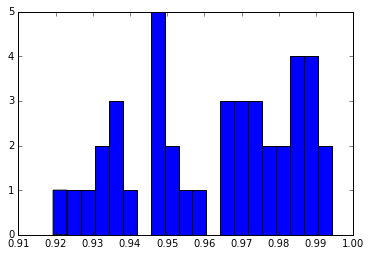

In [18]:
import numpy as np
import scipy.stats as stats

import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt

outputURL = '/global/homes/s/ssingh79/convolutional_autoencoder-master/output_files/'
foldername = 'Supervised_CNN'
softmax_fname = '/softmax_probability.npz'

softmax_fpath = outputURL + foldername + softmax_fname

with np.load(softmax_fpath) as f:
    softmax_prob = [f['arr_%d' % i] for i in range(len(f.files))]

softmax_prob = softmax_prob[0]
#print(softmax_prob)
theoret_model_1 = softmax_prob[:,0]
th_plot_1 = theoret_model_1[theoret_model_1>0.5]
print(th_plot_1)

%matplotlib inline
#plt.hist(th_plot_1, bins=20)

kde = stats.gaussian_kde()
y = kde(th_plot_1)

theoret_model_2 = softmax_prob[:,1]
    